In [1]:
import mne

In [2]:
mne.set_log_level('WARNING')

In [3]:
mne.set_log_level('INFO')

In [4]:
mne.get_config_path()

'C:\\Users\\piero\\AppData\\Roaming\\.mne\\mne-python.json'

In [5]:
from mne.datasets import sample  # noqa
data_path = sample.data_path()
raw_fname = data_path + '/MEG/sample/sample_audvis_filt-0-40_raw.fif'
print(raw_fname)

C:\Users\piero\mne_data\MNE-sample-data/MEG/sample/sample_audvis_filt-0-40_raw.fif


In [6]:
raw = mne.io.read_raw_fif(raw_fname)
print(raw)
print(raw.info)

Opening raw data file C:\Users\piero\mne_data\MNE-sample-data\MEG\sample\sample_audvis_filt-0-40_raw.fif...
    Read a total of 4 projection items:
        PCA-v1 (1 x 102)  idle
        PCA-v2 (1 x 102)  idle
        PCA-v3 (1 x 102)  idle
        Average EEG reference (1 x 60)  idle
    Range : 6450 ... 48149 =     42.956 ...   320.665 secs
Ready.
Current compensation grade : 0
<Raw  |  sample_audvis_filt-0-40_raw.fif, n_channels x n_times : 376 x 41700 (277.7 sec), ~3.7 MB, data not loaded>
<Info | 19 non-empty fields
    bads : list | MEG 2443, EEG 053
    buffer_size_sec : numpy.float64 | 13.3196808772
    ch_names : list | MEG 0113, MEG 0112, MEG 0111, MEG 0122, MEG 0123, ...
    chs : list | 376 items (EOG: 1, EEG: 60, STIM: 9, GRAD: 204, MAG: 102)
    comps : list | 0 items
    custom_ref_applied : bool | False
    dev_head_t : 'mne.transforms.Transform | 3 items
    dig : list | 146 items
    events : list | 0 items
    file_id : dict | 4 items
    highpass : float | 0.1000000

In [7]:
raw2=raw.copy()

Setting up band-pass filter from 1 - 30 Hz
l_trans_bandwidth chosen to be 1.0 Hz
h_trans_bandwidth chosen to be 7.5 Hz
Filter length of 660 samples (6.600 sec) selected


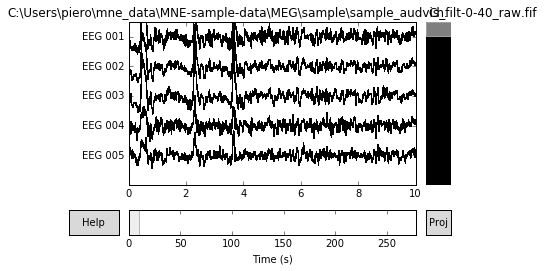

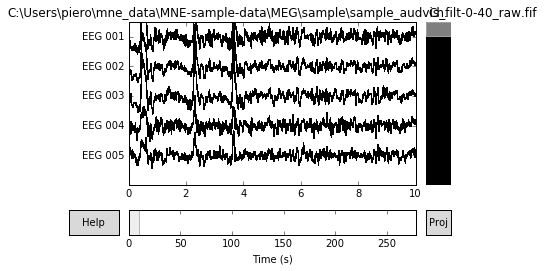

In [10]:
raw2.load_data().pick_types(eeg=True,meg=False).resample(sfreq=100).filter(1, 30).plot(n_channels=5)

Reading 0 ... 41699  =      0.000 ...   277.709 secs...
319 events found
Events id: [ 1  2  3  4  5 32]
319 events found
Events id: [ 1  2  3  4  5 32]
Setting up band-pass filter from 1 - 30 Hz
l_trans_bandwidth chosen to be 1.0 Hz
h_trans_bandwidth chosen to be 7.5 Hz
Filter length of 660 samples (6.600 sec) selected


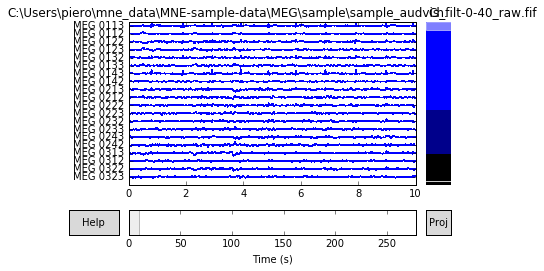

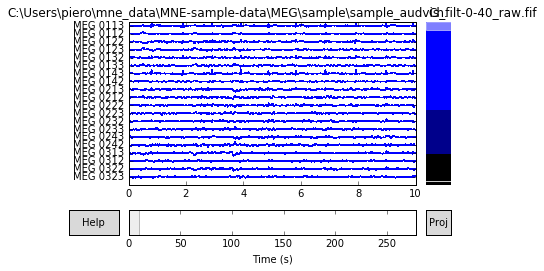

In [12]:
raw.copy().load_data().resample(sfreq=100).filter(1, 30).plot()

In [28]:
type(raw.ch_names)

list

In [14]:
start, stop = raw.time_as_index([100, 115])  # 100 s to 115 s data segment


In [15]:
data, times = raw[:, start:stop]


In [16]:
raw.info

<Info | 19 non-empty fields
    bads : list | MEG 2443, EEG 053
    buffer_size_sec : numpy.float64 | 13.3196808772
    ch_names : list | MEG 0113, MEG 0112, MEG 0111, MEG 0122, MEG 0123, ...
    chs : list | 376 items (EOG: 1, EEG: 60, STIM: 9, GRAD: 204, MAG: 102)
    comps : list | 0 items
    custom_ref_applied : bool | False
    dev_head_t : 'mne.transforms.Transform | 3 items
    dig : list | 146 items
    events : list | 0 items
    file_id : dict | 4 items
    highpass : float | 0.10000000149 Hz
    hpi_meas : list | 1 items
    hpi_results : list | 1 items
    lowpass : float | 40.0 Hz
    meas_date : numpy.ndarray | 2002-12-03 14:01:10
    meas_id : dict | 4 items
    nchan : int | 376
    projs : list | PCA-v1: off, PCA-v2: off, PCA-v3: off, ...
    sfreq : float | 150.153747559 Hz
    acq_pars : NoneType
    acq_stim : NoneType
    ctf_head_t : NoneType
    description : NoneType
    dev_ctf_t : NoneType
    experimenter : NoneType
    hpi_subsystem : NoneType
    kit_syste

In [17]:
print(data.shape)
print(times.shape)

(376L, 2252L)
(2252L,)


In [26]:
times[0:3]

array([  99.99750419,  100.00416403,  100.01082387])

In [23]:
raw[2:20, start:(start+3)]

(array([[ -1.28994619e-12,  -1.03468366e-12,  -5.22648086e-13],
        [ -1.39864477e-11,  -1.33827352e-11,  -1.25398762e-11],
        [  1.74806905e-12,   2.07411382e-12,   3.05542326e-12],
        [ -1.07101808e-12,  -7.57247439e-13,  -1.88270403e-13],
        [ -2.95993608e-12,  -5.71606606e-13,   1.33746330e-13],
        [  7.32767578e-12,   8.54703527e-12,   6.30149345e-12],
        [ -1.07129561e-12,  -7.70419043e-13,  -2.33459557e-13],
        [  2.06798489e-12,  -3.05069265e-13,  -4.34662419e-12],
        [  5.49267075e-12,   5.99245818e-12,   4.70026914e-12],
        [ -1.19390116e-12,  -9.20992043e-13,  -4.09222322e-13],
        [  9.80468477e-13,   5.55972948e-13,   7.62428285e-13],
        [  4.64821777e-12,  -1.47360771e-12,  -2.29392183e-12],
        [ -7.52482440e-13,  -4.97931740e-13,   4.18049940e-14],
        [ -1.16353117e-12,  -3.14348571e-13,   1.74415397e-12],
        [ -3.23310122e-12,  -4.51375120e-12,  -3.43284822e-12],
        [ -4.52446335e-13,  -2.73566854e

In [27]:
type(raw)

mne.io.fiff.raw.Raw

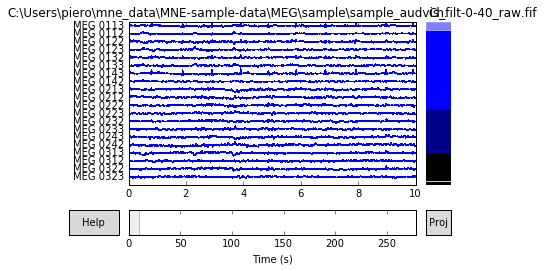

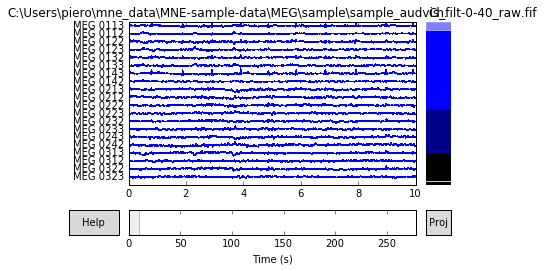

In [16]:
data, times = raw[2:20:3, start:stop]  # access underlying data
raw.plot()

In [17]:
stop-start

2252

Save a segment of 150s of raw data (MEG only):

In [29]:
picks = mne.pick_types(raw.info, meg=True, eeg=False, stim=True,exclude='bads')

In [32]:
raw.save('sample_audvis_meg_raw2.fif', tmin=0, tmax=150, picks=picks,overwrite=True)

This filename (sample_audvis_meg_raw2.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
Writing D:\piero\Documents\Models\mne\sample_audvis_meg_raw2.fif


<ipython-input-32-fa824f3b8c71>:1: RuntimeWarning: This filename (sample_audvis_meg_raw2.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
  raw.save('sample_audvis_meg_raw2.fif', tmin=0, tmax=150, picks=picks,overwrite=True)


Closing D:\piero\Documents\Models\mne\sample_audvis_meg_raw2.fif [done]


In [33]:
picks.shape

(314L,)

Define and read epochs

First extract events:

In [34]:
events = mne.find_events(raw,output = 'step')
print(events[:10])

638 events found
Events id: [ 0  1  2  3  4  5 32]
[[6994    0    2]
 [6997    2    0]
 [7086    0    3]
 [7089    3    0]
 [7192    0    1]
 [7195    1    0]
 [7304    0    4]
 [7307    4    0]
 [7413    0    2]
 [7415    2    0]]


In [ ]:
events

In [23]:
picks

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18